In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Tạo bộ dữ liệu

In [3]:
np.random.seed(42)
X = 2 * np.random.rand(200, 1)
true_w = 3.5
true_b = 2.0
noise = np.random.randn(200, 1) * 0.5
y = true_b + true_w * X + noise

### Trực quan hóa

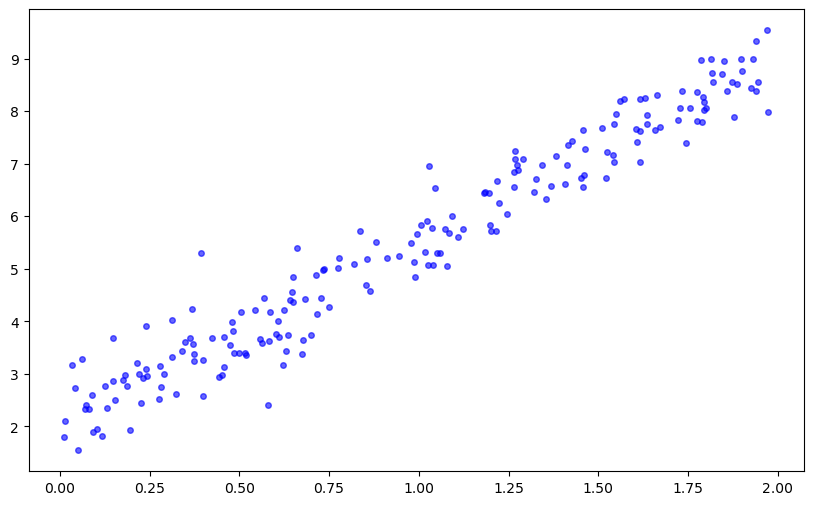

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", markersize=8, alpha=0.6, label="Dữ liệu quan sát")
plt.show()

### Xây dựng hàm cần thiết

In [11]:
def compute_cost(x, y, w, b):
    n = x.shape[0]
    cost = 0
    for i in range(n):
        cost += (x[i] * w + b - y[i]) ** 2
    cost /= (2 * n)
    return cost

In [35]:
def gradient_descent(x, y, w, b):
    n = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(n):
        dj_dw += (x[i] * w + b - y[i]) * x[i]
        dj_db += (x[i] * w + b - y[i])
    dj_dw /= n
    dj_db /= n
    return (dj_dw, dj_db)

In [36]:
def fit(x, y):
    iterations = 2000
    alpha = 0.01
    epsilon = 1e-5
    train_w, train_b = 0, 0
    n = x.shape[0]
    for i in range(iterations):
        old_cost = compute_cost(x, y, train_w, train_b)
        dj_dw, dj_db = gradient_descent(x, y, train_w, train_b)
        train_w -= alpha * dj_dw
        train_b -= alpha * dj_db
        new_cost = compute_cost(x, y, train_w, train_b)
        if abs(new_cost - old_cost) < epsilon:
            break;
    return train_w, train_b

In [37]:
w, b = fit(X, y)

In [38]:
print(w, b)

[3.3539793] [2.19895079]


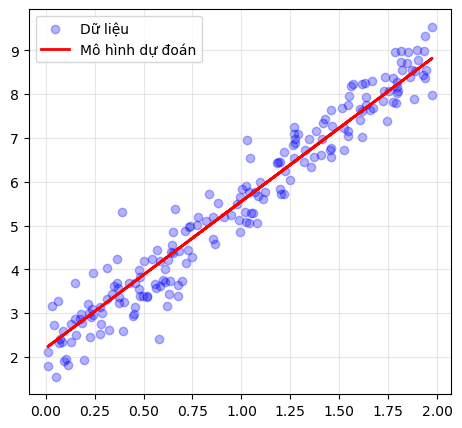

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.3, label='Dữ liệu')
plt.plot(X, w * X + b, 'r-', linewidth=2, label='Mô hình dự đoán')
plt.legend()
plt.grid(True, alpha=0.3)